# ヒストグラム＆棒グラフ

- plt.hist( )
    - *ヒストグラム*
        - 縦軸　:　度数(frequency)
        - 横軸　:　階級(bin)
        - **連続した値に使用する (区切られたdataの中にどれだけ値があるか)**


- plt.bar( )
    - *棒グラフ*
        - **カテゴリカルな値に対して使う**

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### ヒストグラム　:　plt.hist( )

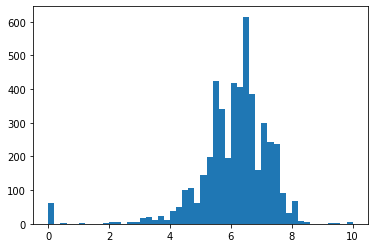

In [54]:
df = pd.read_csv('../pandas/dataset/tmdb_5000_movies.csv')
plt.hist(df['vote_average'], bins=50)
plt.show()

In [55]:
# profit(revenue- budget)のヒストグラムを描いてみる

# 1. filter を使用して 0(NaN)の値を取り去る
df = df[(df['revenue'] != 0) & (df['budget'] != 0)]
df[['budget', 'revenue']]

,budget,revenue
0,237000000,2787965087
1,300000000,961000000
2,245000000,880674609
3,250000000,1084939099
4,260000000,284139100
...,...,...
4773,27000,3151130
4788,12000,6000000
4792,20000,99000
4796,7000,424760


In [56]:
# 2. profit の　　columns を作成
df['profit'] = df.apply(lambda x: x['revenue'] - x['budget'], axis=1)
df.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,profit
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2550965087


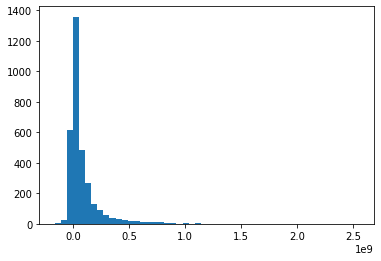

In [57]:
# plot する
plt.hist(df['profit'], bins=50)
plt.show()

## 模範回答

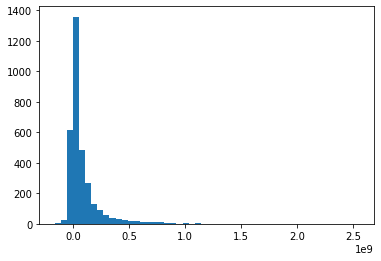

In [58]:
# profit(revenue - budget) のヒストグラム
fig, axes = plt.subplots()

# filter で 0 以外のモノを取得する
df = df[(df['revenue'] !=0) & (df['budget'] !=0)]

# profit columns を作成
df['profit'] = df.apply(lambda x: x['revenue'] - x['budget'], axis=1)  # axis=1 を指定しないと各業に対して apply が適用されないので注意

# plot
axes.hist(df['profit'], bins=50)
plt.show()

- ほとんどの　data が小さい値になっている（偏っている）のでヒストグラムの意味を成してない
    - **アバターが1つだけ飛び抜けているので（外れ値） xticks のスケールがおかしな事になっている**
    - *日本で一番の興行収入と言われる「千と千尋の神隠し」でさえ「アバター」の１０分の１*


- <u>xticks のスケールを　log にする</u>
    - リニアではなくログにすることで解決する


- logspace でメモリを作成する時に最大値を決めないといけない
    - $10^{10}$　になっているが　profit　の　max値　にする事でバランスの取れたメモリになる

In [59]:
np.logspace(0, 10, 10)  # 10の10乗を10個取得してくる

array([1.00000000e+00, 1.29154967e+01, 1.66810054e+02, 2.15443469e+03,
       2.78255940e+04, 3.59381366e+05, 4.64158883e+06, 5.99484250e+07,
       7.74263683e+08, 1.00000000e+10])

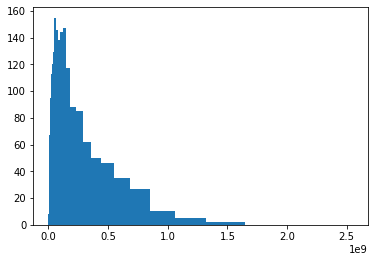

In [64]:
# profit(revenue - budget) のヒストグラム
fig, axes = plt.subplots()
df = df[(df['revenue'] !=0) & (df['budget'] !=0)]
df['profit'] = df.apply(lambda x: x['revenue'] - x['budget'], axis=1)  # axis=1 を指定しないと各業に対して apply が適用されないので注意

# 1 ~ 100 logspace でアバターの最大値まで取得してきた値
logbins = np.logspace(0, np.log10(df['profit'].max()), 100)
axes.hist(df['profit'], bins=logbins)
plt.show()

- メモリは log になっているが、　等間隔にしないと意味を成さない
    - **表示自体がリニアになっているので統一されていない**
    
    
- <u>グラフの表示自体も　log　にする必要がある</u>

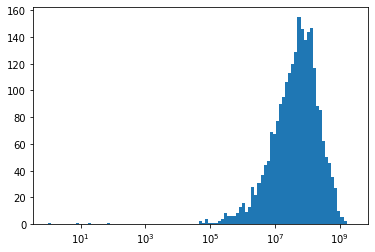

In [65]:
# profit(revenue - budget) のヒストグラム
fig, axes = plt.subplots()
df = df[(df['revenue'] !=0) & (df['budget'] !=0)]
df['profit'] = df.apply(lambda x: x['revenue'] - x['budget'], axis=1)  # axis=1 を指定しないと各業に対して apply が適用されないので注意
logbins = np.logspace(0, np.log10(df['profit'].max()), 100)
axes.hist(df['profit'], bins=logbins)

# グラフの表示を log に変更する
axes.set_xscale('log')

plt.show()

- 他にも$10^{3}$以下は外れ値なのでそれも切り捨てる

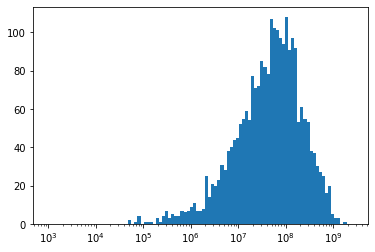

In [67]:
# profit(revenue - budget) のヒストグラム
fig, axes = plt.subplots()
df = df[(df['revenue'] !=0) & (df['budget'] !=0)]
df['profit'] = df.apply(lambda x: x['revenue'] - x['budget'], axis=1)

# 引数を　０　からではなく 3 からにする
logbins = np.logspace(3, np.log10(df['profit'].max()), 100)
axes.hist(df['profit'], bins=logbins)

# グラフの表示を log に変更する
axes.set_xscale('log')
plt.show()

- $10^{3}$でもまだ調整が必要なので$10^{5}$にしてみる

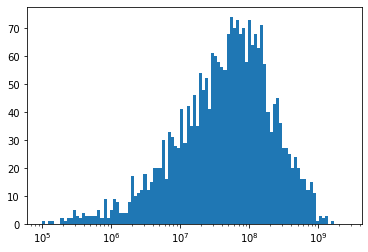

In [68]:
# profit(revenue - budget) のヒストグラム
fig, axes = plt.subplots()
df = df[(df['revenue'] !=0) & (df['budget'] !=0)]
df['profit'] = df.apply(lambda x: x['revenue'] - x['budget'], axis=1)

# 引数を　３　からではなく ５ からにする
logbins = np.logspace(5, np.log10(df['profit'].max()), 100)
axes.hist(df['profit'], bins=logbins)

# グラフの表示を log に変更する
axes.set_xscale('log')
plt.show()

- 扱うデータによっては　log を使用する

## 棒グラフ　:　plt.bar( )

In [72]:
df = pd.DataFrame({'categorical': ['A', 'B', 'C'], 'val': [10, 20, 30]})
df

,categorical,val
0,A,10
1,B,20
2,C,30


<BarContainer object of 3 artists>

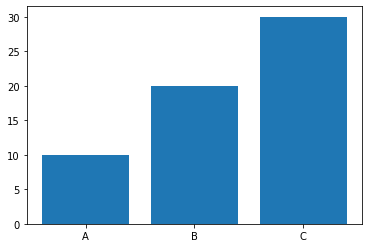

In [73]:
plt.bar('categorical', 'val', data=df)

<BarContainer object of 3 artists>

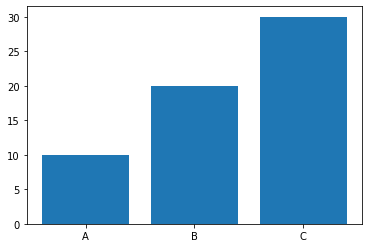

In [74]:
# Series で渡すパターン
plt.bar(df['categorical'], df['val'])

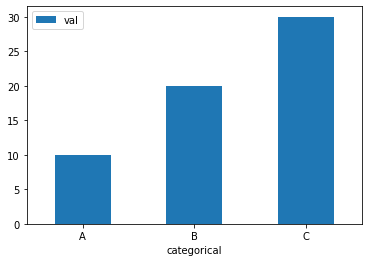

In [80]:
df.plot('categorical', 'val', kind='bar', rot=0)

- *DataFrame　にビルドインされたものは、特に棒グラフの時に使用される*

In [85]:
# .value_counts() で uniqu な値の数を取得する
df = pd.read_csv('../pandas/dataset/tmdb_5000_movies.csv')
df['original_language'].value_counts()

en    4505
fr      70
es      32
de      27
zh      27
hi      19
ja      16
it      14
cn      12
ko      11
ru      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ro       2
cs       2
ta       2
id       2
ar       2
pl       1
te       1
vi       1
sl       1
ps       1
el       1
hu       1
tr       1
xx       1
no       1
is       1
ky       1
af       1
nb       1
Name: original_language, dtype: int64

- *上記を棒グラフで表示したいという事が結構出てくる*
    - そういう場合に　**DataFrame　**

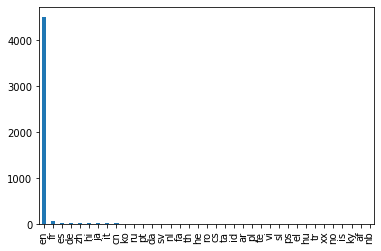

In [86]:
# .value_counts() で uniqu な値の数を取得する
df = pd.read_csv('../pandas/dataset/tmdb_5000_movies.csv')
df['original_language'].value_counts().plot(kind='bar')

#### DataFrame　や　Series　の形でできていたらこのように　**.plot( )**　を使用して表示できる